**Preprocesamiento de la base de datos de Consumo Electrico**

Este archivo consta de los codigos y conclusiones de:
* 1.Separar en datos de entrenamiento y de prueba.
* 2.Preparar datos para realizar aprendizaje supervizado.


# Carga de Librerias y Datos


*Se importan los módulos necesarios para trabajar*

In [1]:
#Pandas es utilizado para leer los set de datos
import pandas as pd
#Numpy es utilizado para generar las series de datos a graficar
import numpy as np
#Seaborn es utilizado para generar los gráficos
import seaborn as sns
import matplotlib.pyplot as plt
#Se importan modulos estadisticos para generar test de hipotesis, entre otros
from sklearn.preprocessing import StandardScaler
#Módulos implementa funciones que evalúan el error de predicción para propósitos específicos
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
#Ignorar warnings
import warnings
warnings.filterwarnings("ignore")
#Modulos para trabajar con Arima y Sarimax
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Dividir arreglos o matrices en subconjuntos aleatorios de tren y prueba
from sklearn.model_selection import train_test_split


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install pmdarima --quiet
import pmdarima as pm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.3 MB/s eta 0:00:00


In [4]:
# Para acceder a los archivos del gdrive
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [5]:
cd /content/gdrive/MyDrive/Tesis/Datos-2

/content/gdrive/MyDrive/Tesis/Datos-2


In [6]:
df=pd.read_csv('df_EDA.csv',
                parse_dates={'dt':['Date','time']},
                infer_datetime_format=True,
                low_memory=False,
                index_col='dt')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2053263 entries, 2007-01-01 00:00:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   other_consumption      float64
dtypes: float64(8)
memory usage: 141.0 MB


In [8]:
df.shape

(2053263, 8)

In [9]:
## resampling of data over hour
df = df.resample('D').mean()
df.shape

(1426, 8)

In [10]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,other_consumption
dt,,,,,,,,
2007-01-01,1.909031,0.102893,240.128979,7.916944,0.000000,0.244444,4.083333,27.489398
2007-01-02,0.881414,0.132182,241.943778,3.714028,0.000000,0.241667,4.556944,9.891620
2007-01-03,0.704204,0.136617,243.557090,3.014028,0.000000,0.238889,3.309028,8.188819
2007-01-04,2.263481,0.140487,239.750299,9.478194,0.729861,5.275694,7.566667,24.152454
2007-01-05,1.884281,0.120246,240.495764,7.885139,1.029861,0.263194,5.279167,24.832454
...,...,...,...,...,...,...,...,...
2010-11-22,1.417733,0.098857,240.197118,6.014167,3.371528,1.465278,7.038889,11.753194
2010-11-23,1.095511,0.095451,240.575528,4.674444,1.299306,0.318056,5.285417,11.355741
2010-11-24,1.247394,0.091986,240.030965,5.249583,0.761111,1.977778,8.488889,9.562130


In [11]:
#Seleccion de caracteristicas
features =df.columns

#Se define escalado
std_scaler = StandardScaler()
#Transformacion

for i in features:
  df[i] = std_scaler.fit_transform(df[i].values.reshape(-1,1))

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,other_consumption
dt,,,,,,,,
2007-01-01,2.034827,-0.579222,-0.344607,1.981839,-1.006100,-0.715621,-0.877707,4.595715
2007-01-02,-0.479665,0.254588,0.541014,-0.505030,-1.006100,-0.717544,-0.698740,0.182495
2007-01-03,-0.913282,0.380838,1.328309,-0.919220,-1.006100,-0.719467,-1.170300,-0.244538
2007-01-04,2.902136,0.491035,-0.529403,2.905632,-0.344237,2.768191,0.438568,3.758867
2007-01-05,1.974266,-0.085215,-0.165616,1.963020,-0.072187,-0.702637,-0.425828,3.929399


#2.Separar en conjunto de entrenamiento y de test

In [12]:
# Porcentaje de train.
p_train = 0.80

largo_data=df.shape[0]

#Separacion lineal del dataset
train=df.iloc[0:int(largo_data*p_train),:]
test=df.iloc[int(largo_data*p_train):largo_data,:]


In [13]:
train.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,other_consumption
dt,,,,,,,,
2010-02-09,1.477351,-0.746356,1.129829,1.392028,-0.241588,-0.687731,2.766980,1.003101
2010-02-10,0.674056,-0.708596,0.786470,0.620188,-0.238440,0.546149,0.789155,0.495799
2010-02-11,-0.308836,-1.054013,1.794490,-0.390634,-1.006100,-0.726199,0.181401,-0.106683
2010-02-12,0.580261,-0.893245,1.362079,0.497328,-0.224585,-0.734855,1.570891,0.276893
2010-02-13,1.359464,-0.645886,1.002325,1.287823,0.151373,1.659815,2.489082,0.027265


#Arima

Modelo ARIMA para pronósticos de series temporales ARIMA significa modelo de promedio móvil integrado autorregresivo y se especifica mediante tres
parámetros de orden: (p, d, q).

* **AR( p ) Autorregresión** : un modelo de regresión que utiliza la relación dependiente entre una observación actual y las observaciones durante un período anterior. Un componente autorregresivo ( AR(p) ) se refiere al uso de valores pasados ​en la ecuación de regresión para la serie temporal .

* **I( d ) Integración** : utiliza la diferenciación de observaciones (restando una observación de la observación en el paso de tiempo anterior) para hacer que la serie de tiempo sea estacionaria. La diferenciación implica la resta de los valores actuales de una serie con sus valores anteriores d número de veces.

* **MA( q ) Promedio móvil** : un modelo que utiliza la dependencia entre una observación y un error residual de un modelo de promedio móvil aplicado a observaciones retrasadas. Un componente de promedio móvil representa el error del modelo como una combinación de términos de error anteriores. El orden q representa el número de términos a incluir en el modelo.

Del modelo:
* Se entrena modelo Auto_Arima para encontrar los mejores coeficientes del modelo.
* Variable objetivo a predecir Global active power
* Se entrena con 10377 pasos hacia delante
* Se obtiene precision del modelo con metricas MAPE y RMSE

In [14]:
target="Global_active_power"

In [15]:
def Auto_Arima(data,trace_value):
  ARIMA_model = pm.auto_arima(data,
                        test='adf',
                        max_p=3, max_q=3,
                        m=7,
                        d=None,
                        seasonal=False,
                        trace=trace_value,
                        error_action='warn',
                        suppress_warnings=True,
                        stepwise=True)
  return ARIMA_model

In [16]:
#Entrenamiento del modelo Arima
Arima_model=Auto_Arima(train[target],True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2605.006, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3336.166, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2803.402, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2961.913, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2609.108, Time=0.52 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2623.225, Time=0.84 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2599.138, Time=0.55 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2600.184, Time=0.42 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2515.536, Time=1.96 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2604.172, Time=0.73 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=2514.907, Time=5.59 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2605.873, Time=1.96 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2600.859, Time=1.62 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2606.680, Time=1.50 sec

Best model:  ARIMA(3,0,3)(0,0,0)

In [17]:
#Prediccion del modelo Arima
#Se entrena con 10377 pasos hacia delante
n_periods=len(test)
Arima_forecast=Arima_model.predict(n_periods=n_periods)
Arima_forecast_df = pd.DataFrame(Arima_forecast.values,index = test.index,columns=['Prediction'])

<Axes: xlabel='dt'>

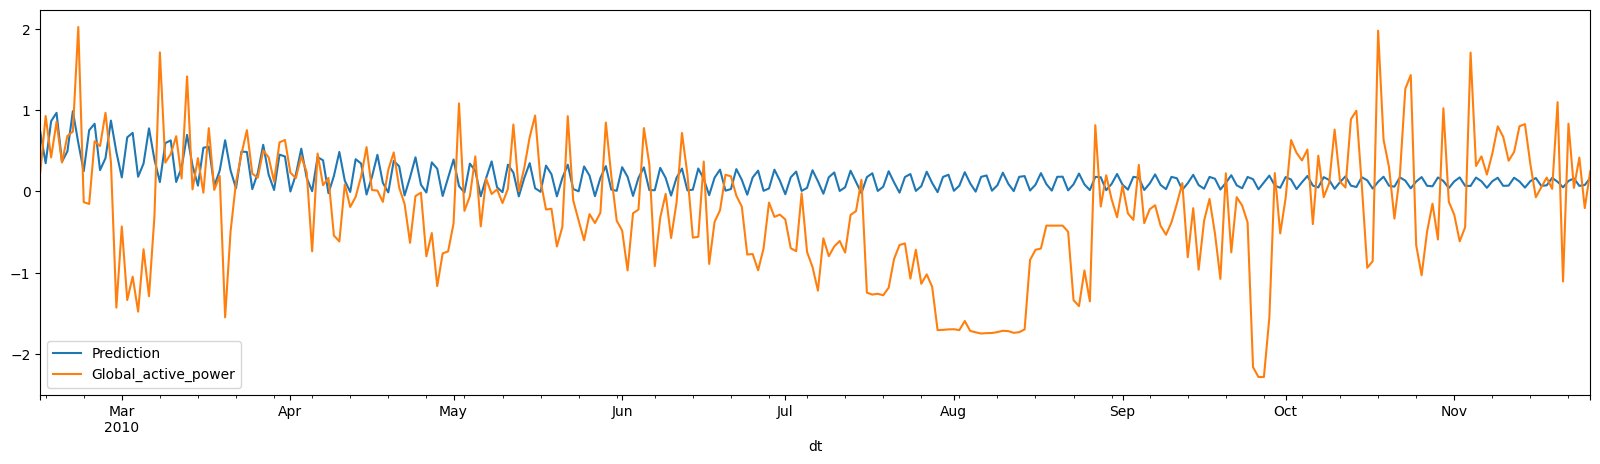

In [18]:
pd.concat([Arima_forecast_df,test[target]],axis=1).plot(figsize=(20, 5))

In [25]:
result_mse = mse(test[target], Arima_forecast)
result_mape = mape(test[target], Arima_forecast)
result_mae = mae(test[target], Arima_forecast)

print(f'mse: {result_mse}')
print(f'mae: {result_mae}')
print(f'mape: {result_mape}')


mse: 0.7327301394683488
mae: 0.6551179288399133
mape: 1.7159307923152474


#Sarima


Del modelo:
* Se entrena modelo Auto Sarima para encontrar los mejores coeficientes del modelo.
* Variable objetivo a predecir Global active power
* Se entrena con 10377 pasos hacia delante
* Se obtiene precision del modelo con metricas MAPE y RMSE

In [20]:
def Auto_Sarima(data,trace_value):
  SARIMAX_model = pm.auto_arima(data,
                        test='adf',
                        max_p=7, max_q=7,
                        m=7,
                        d=None,
                        seasonal=True,
                        trace=trace_value,
                        error_action='warn',
                        suppress_warnings=True,
                        n_jobs=-1,
                        stepwise=True)
  return SARIMAX_model

In [21]:
#Entrenamiento del modelo Arima
Sarima_model=Auto_Sarima(train[target],True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=2447.575, Time=7.44 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3334.895, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=2635.900, Time=0.58 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=2804.259, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=3336.166, Time=0.04 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=2569.570, Time=2.77 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : AIC=2556.724, Time=3.30 sec
 ARIMA(2,0,2)(2,0,1)[7] intercept   : AIC=2449.407, Time=10.07 sec
 ARIMA(2,0,2)(1,0,2)[7] intercept   : AIC=2449.542, Time=10.97 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=2606.680, Time=1.46 sec
 ARIMA(2,0,2)(0,0,2)[7] intercept   : AIC=2553.216, Time=5.51 sec
 ARIMA(2,0,2)(2,0,0)[7] intercept   : AIC=2525.694, Time=5.78 sec
 ARIMA(2,0,2)(2,0,2)[7] intercept   : AIC=2451.653, Time=10.64 sec
 ARIMA(1,0,2)(1,0,1)[7] intercept   : AIC=2445.202, Time=6.28 sec
 ARIMA(1,0,2)(0,0,1)[7] interc

In [ ]:
Sarima_forecast = Sarima_model.predict(n_periods=len(test))
Sarima_forecast

In [22]:
#Prediccion del modelo Arima
#Se entrena con 10377 pasos hacia delante
Sarima_forecast = Sarima_model.predict(n_periods=len(test))
Sarima_forecast_df = pd.DataFrame(Sarima_forecast.values,index = test.index,columns=['Prediction'])

<Axes: xlabel='dt'>

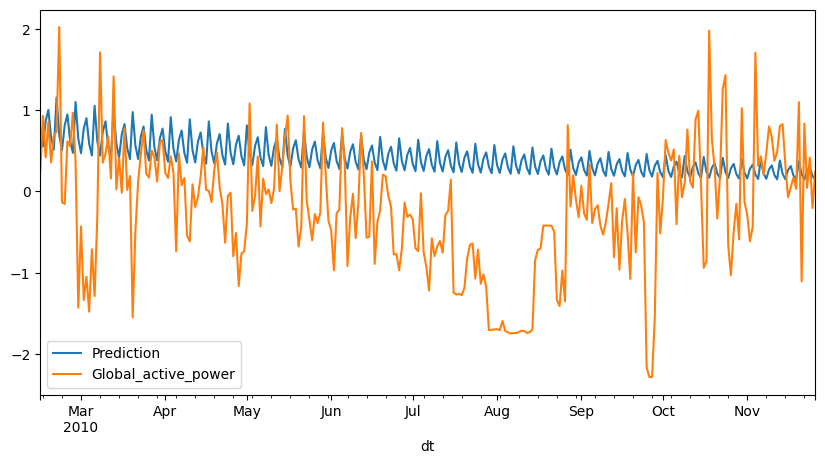

In [26]:
#Grafico
pd.concat([Sarima_forecast_df,test[target]],axis=1).plot(figsize=(10, 5))

In [24]:
result_mse = mse(test[target], Sarima_forecast)
result_mape = mape(test[target], Sarima_forecast)
result_mae = mape(test[target], Sarima_forecast)

print(f'mse: {result_mse}')
print(f'mae: {result_mae}')
print(f'mape: {result_mape}')

mse: 0.9980896673897486
mae: 3.1302007088289314
mape: 3.1302007088289314
